### importing libraries for eda

In [50]:
import pandas as pd
import  matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

In [51]:
data=pd.read_csv("WirelessHeadphones.csv")

In [52]:
data.head()

,Unnamed: 0,Brands,Colors,Battery,Price,Original_price,Rating,Total_reviews,Discount
0,0,Aroma,"Electric White, True Wireless","('50H', 'H')",₹479,"₹2,999",4.0,(538),84% off
1,1,Boult,"White Opal, True Wireless","('48H', 'H')","₹1,199","₹3,499",4.1,"(1,21,538)",65% off
2,2,boAt,"Mocha Elegance, True Wireless","('100 HRS', 'HRS')",₹899,"₹4,990",4.0,"(42,973)",81% off
3,3,boAt,"Pebble Black, True Wireless","('40 HRS', 'HRS')",₹799,"₹2,490",4.0,"(12,57,788)",67% off
4,4,realme,"Jazz Blue, True Wireless","('38 h', 'h')","₹1,099","₹2,999",4.2,"(3,65,802)",63% off


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      440 non-null    int64  
 1   Brands          440 non-null    object 
 2   Colors          440 non-null    object 
 3   Battery         279 non-null    object 
 4   Price           440 non-null    object 
 5   Original_price  432 non-null    object 
 6   Rating          440 non-null    float64
 7   Total_reviews   440 non-null    object 
 8   Discount        430 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 31.1+ KB


In [54]:
## drop unwanted column
data= data.drop(columns=['Unnamed: 0'], axis = 1)

In [55]:
data

,Brands,Colors,Battery,Price,Original_price,Rating,Total_reviews,Discount
0,Aroma,"Electric White, True Wireless","('50H', 'H')",₹479,"₹2,999",4.0,(538),84% off
1,Boult,"White Opal, True Wireless","('48H', 'H')","₹1,199","₹3,499",4.1,"(1,21,538)",65% off
2,boAt,"Mocha Elegance, True Wireless","('100 HRS', 'HRS')",₹899,"₹4,990",4.0,"(42,973)",81% off
3,boAt,"Pebble Black, True Wireless","('40 HRS', 'HRS')",₹799,"₹2,490",4.0,"(12,57,788)",67% off
4,realme,"Jazz Blue, True Wireless","('38 h', 'h')","₹1,099","₹2,999",4.2,"(3,65,802)",63% off
...,...,...,...,...,...,...,...,...
435,house,"White, True Wireless",NaN,₹391,"₹1,999",4.6,(14),80% off
436,Aroma,"Galaxy Green, True Wireless","('60H', 'H')",₹493,"₹2,899",4.0,(538),82% off
437,TRIGGR,"Jungle Green, True Wireless","('40H', 'H')",₹599,"₹2,999",4.0,"(42,330)",80% off
438,Edyell,"Green, True Wireless","('48 HRS', 'HRS')","₹1,119","₹5,999",4.0,(146),81% off


In [56]:
data.columns = data.columns.str.strip()

data.columns

Index(['Brands', 'Colors', 'Battery', 'Price', 'Original_price', 'Rating',
       'Total_reviews', 'Discount'],
      dtype='object')

In [57]:
# checking duplicates
data[data.duplicated()]

,Brands,Colors,Battery,Price,Original_price,Rating,Total_reviews,Discount
40,Aroma,"Electric White, True Wireless","('50H', 'H')",₹479,"₹2,999",4.0,(538),84% off
41,Boult,"White Opal, True Wireless","('48H', 'H')","₹1,199","₹3,499",4.1,"(1,21,538)",65% off
42,TRIGGR,"Black, True Wireless",NaN,₹799,"₹3,999",4.0,"(58,526)",80% off
44,boAt,"Serene Green, True Wireless","('50 HRS', 'HRS')","₹1,099","₹6,490",4.1,"(1,12,128)",83% off
46,Aroma,"Electric Blue, True Wireless","('50H', 'H')",₹479,"₹2,999",4.0,(538),84% off
...,...,...,...,...,...,...,...,...
427,Noise,"Midnight Blue, True Wireless","('50 H', 'H')",₹799,"₹2,999",4.0,"(5,99,132)",73% off
430,Aroma,"Electric Green, True Wireless","('50H', 'H')",₹479,"₹2,999",4.0,(538),84% off
431,Boult,"Lavender, True Wireless","('48 H', 'H')",₹799,"₹2,999",4.1,(460),73% off
436,Aroma,"Galaxy Green, True Wireless","('60H', 'H')",₹493,"₹2,899",4.0,(538),82% off


In [58]:
data.isnull().sum()

Brands              0
Colors              0
Battery           161
Price               0
Original_price      8
Rating              0
Total_reviews       0
Discount           10
dtype: int64

In [59]:
data.apply(pd.Series.unique)

Brands            [Aroma, Boult, boAt, realme, Noise, CMF, Portr...
Colors            [Electric White, True Wireless, White Opal, Tr...
Battery           [('50H', 'H'), ('48H', 'H'), ('100 HRS', 'HRS'...
Price             [₹479, ₹1,199, ₹899, ₹799, ₹1,099, ₹1,799, ₹69...
Original_price    [₹2,999, ₹3,499, ₹4,990, ₹2,490, ₹1,999, ₹4,99...
Rating            [4.0, 4.1, 4.2, 4.3, 4.6, 4.4, 3.9, 4.7, 4.5, ...
Total_reviews     [(538), (1,21,538), (42,973), (12,57,788), (3,...
Discount          [84% off, 65% off, 81% off, 67% off, 63% off, ...
dtype: object

## Data Cleaning

In [60]:
## Correct Values in columns
data['Brands']= data['Brands'].str.lower()
data['Colors']= data['Colors'].str.lower().fillna('unknown')
data['Colors']= data['Colors'].str.replace(', true wireless','',regex=True).replace(',','',regex=True).astype(object)
data['Battery']= data['Battery'].str.replace('\D', '', regex=True).fillna(0).astype(int)
data['Battery']= data['Battery'].replace(0, data['Battery'].mean()).astype(int)
data['Price']= data['Price'].replace('\D', '', regex=True).fillna(0).astype(int)
data['Original_price']= data['Original_price'].replace('\D', '', regex=True).fillna(0).astype(int)
data['Original_price']= data['Original_price'].replace(0, data['Original_price'].mean()).astype(int)
data['Discount']= data['Discount'].replace('% off','',regex= True).fillna(0).astype(int)
data['Discount']= data['Discount'].replace(0, data['Discount'].mean()).astype(int)
data['Rating']= data['Rating'].fillna(0).astype(float)
data['Total_reviews']= data['Total_reviews'].replace('[^\d]','',regex= True).fillna(0).astype(int)

In [61]:
data.head()

,Brands,Colors,Battery,Price,Original_price,Rating,Total_reviews,Discount
0,aroma,electric white,50,479,2999,4.0,538,84
1,boult,white opal,48,1199,3499,4.1,121538,65
2,boat,mocha elegance,100,899,4990,4.0,42973,81
3,boat,pebble black,40,799,2490,4.0,1257788,67
4,realme,jazz blue,38,1099,2999,4.2,365802,63


In [62]:
data.to_csv("True_Wireless_Headphones.csv")

In [15]:
data.shape

(440, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brands          440 non-null    object 
 1   Colors          440 non-null    object 
 2   Battery         440 non-null    int64  
 3   Price           440 non-null    int64  
 4   Original_price  440 non-null    int64  
 5   Rating          440 non-null    float64
 6   Total_reviews   440 non-null    int64  
 7   Discount        440 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 27.6+ KB


In [17]:
## recheck missing values
data.isnull().sum()

Brands            0
Colors            0
Battery           0
Price             0
Original_price    0
Rating            0
Total_reviews     0
Discount          0
dtype: int64

In [18]:
# Remove rows with missing values
df_dropna = data.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brands          440 non-null    object 
 1   Colors          440 non-null    object 
 2   Battery         440 non-null    int64  
 3   Price           440 non-null    int64  
 4   Original_price  440 non-null    int64  
 5   Rating          440 non-null    float64
 6   Total_reviews   440 non-null    int64  
 7   Discount        440 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 27.6+ KB


In [19]:
data.apply(pd.Series.unique)

Brands            [aroma, boult, boat, realme, noise, cmf, portr...
Colors            [electric white, white opal, mocha elegance, p...
Battery           [50, 48, 100, 40, 38, 34, 20, 28, 60, 35, 56, ...
Price             [479, 1199, 899, 799, 1099, 1799, 692, 798, 13...
Original_price    [2999, 3499, 4990, 2490, 1999, 4999, 3999, 599...
Rating            [4.0, 4.1, 4.2, 4.3, 4.6, 4.4, 3.9, 4.7, 4.5, ...
Total_reviews     [538, 121538, 42973, 1257788, 365802, 599132, ...
Discount          [84, 65, 81, 67, 63, 73, 40, 70, 77, 80, 85, 8...
dtype: object

## Steps Involved in Exploratory Data Analysis

### Univariate Analysis
##### A.Discrete Data (i.e. Categorical or Numerical Discrete Columns)
* Statistical Non Visual Analysis
Purpose: Helps us describe and summarize the data
count, nunique, unique, value_counts
* Visual Analysis
Purpose: Helps us understand how the data is distributed and Outliers
Bar/Count Plot

### Univariate Analysis - Statistical Non Visual Analysis

In [20]:
## split into numerical and categorical 

numerical_columns= data.select_dtypes(include= ['int64','float64'])
categorical_columns= data.select_dtypes(include= ['object'])

In [21]:
print(numerical_columns)
print('-'*50)
print(categorical_columns)

     Battery  Price  Original_price  Rating  Total_reviews  Discount
0         50    479            2999     4.0            538        84
1         48   1199            3499     4.1         121538        65
2        100    899            4990     4.0          42973        81
3         40    799            2490     4.0        1257788        67
4         38   1099            2999     4.2         365802        63
..       ...    ...             ...     ...            ...       ...
435       34    391            1999     4.6             14        80
436       60    493            2899     4.0            538        82
437       40    599            2999     4.0          42330        80
438       48   1119            5999     4.0            146        81
439       43   2799           11999     4.0           8358        76

[440 rows x 6 columns]
--------------------------------------------------
     Brands          Colors
0     aroma  electric white
1     boult      white opal
2      boat  

In [22]:
# Impute missing values
data.describe()

,Battery,Price,Original_price,Rating,Total_reviews,Discount
count,440.000000,440.000000,440.000000,440.000000,4.400000e+02,440.000000
mean,47.265909,1961.284091,4825.186364,4.095682,1.116329e+05,70.695455
std,50.706577,3685.234958,3965.937128,0.157006,3.121263e+05,15.293722
min,20.000000,360.000000,1099.000000,3.900000,3.000000e+00,1.000000
25%,34.000000,699.000000,2999.000000,4.000000,5.380000e+02,65.000000
50%,40.000000,899.000000,3499.000000,4.000000,1.000650e+04,75.000000
75%,50.000000,1299.000000,4999.000000,4.100000,7.394500e+04,82.000000
max,771.000000,26900.000000,29990.000000,5.000000,1.946756e+06,90.000000


In [23]:
def discrete_univariate_analysis(categorical_columns):
    for col_name in categorical_columns:
        print("*"*10, col_name, "*"*10)
        print(categorical_columns[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', categorical_columns[col_name].value_counts())
        print()

In [24]:
discrete_univariate_analysis(categorical_columns)

********** Brands **********
count                                                    440
nunique                                                   50
unique     [aroma, boult, boat, realme, noise, cmf, portr...
Name: Brands, dtype: object
Value Counts: 
 Brands
boult         75
aroma         61
boat          43
triggr        43
noise         30
hoppup        25
mivi          18
realme        15
sony          14
truke         13
ptron          7
nu             7
oneplus        6
beats          6
number         5
oppo           5
bose           4
cmf            4
chaebol        4
soundcore      3
sennheiser     3
nothing        3
oraimo         3
snowbudy       3
vivo           3
mi             3
pharaoh        2
izwi           2
infinix        2
dubstep        2
edyell         2
house          2
samsung        2
xewiss         2
tunifi         2
pb             2
saztech        1
portronics     1
touch          1
vmv            1
lava           1
moto           1
jabra          1
itel  

In [25]:
def numerical_univariate_analysis(numerical_columns):
    for col_name in numerical_columns:
        print("*"*10, col_name, "*"*10)
        print(numerical_columns[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()
numerical_univariate_analysis(numerical_columns)

********** Battery **********
min        20.000000
max       771.000000
mean       47.265909
median     40.000000
std        50.706577
Name: Battery, dtype: float64

********** Price **********
min         360.000000
max       26900.000000
mean       1961.284091
median      899.000000
std        3685.234958
Name: Price, dtype: float64

********** Original_price **********
min        1099.000000
max       29990.000000
mean       4825.186364
median     3499.000000
std        3965.937128
Name: Original_price, dtype: float64

********** Rating **********
min       3.900000
max       5.000000
mean      4.095682
median    4.000000
std       0.157006
Name: Rating, dtype: float64

********** Total_reviews **********
min       3.000000e+00
max       1.946756e+06
mean      1.116329e+05
median    1.000650e+04
std       3.121263e+05
Name: Total_reviews, dtype: float64

********** Discount **********
min        1.000000
max       90.000000
mean      70.695455
median    75.000000
std       15.293722

In [26]:
## split into numerical and categorical 
numerical_columns= data.select_dtypes(include= ['int64','float64']).columns.tolist()
print(numerical_columns)
print("-"*50)
categorical_columns= data.select_dtypes(include= ['object']).columns.tolist()
print(categorical_columns)

['Battery', 'Price', 'Original_price', 'Rating', 'Total_reviews', 'Discount']
--------------------------------------------------
['Brands', 'Colors']


### Univariate - Visual Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

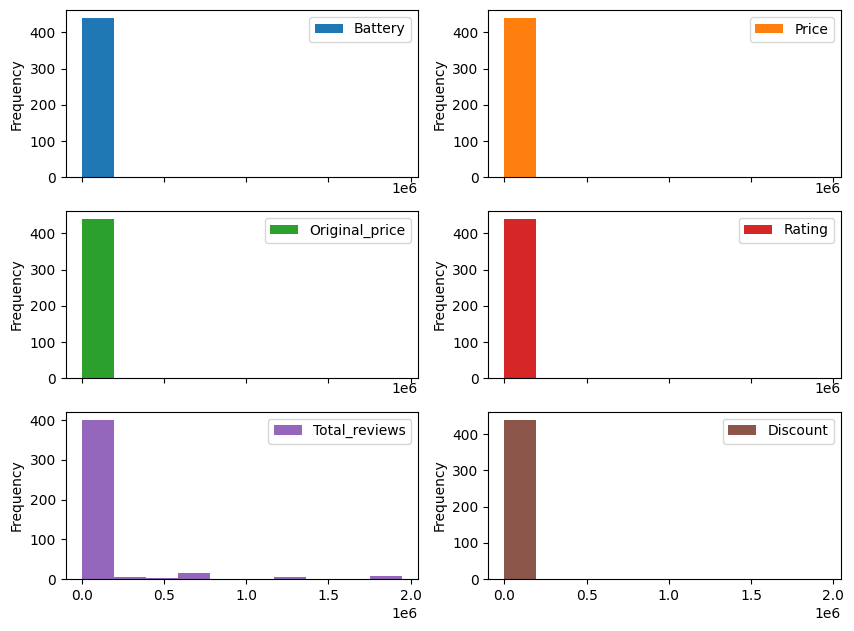

In [27]:
data.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

Battery              Axes(0.125,0.712609;0.352273x0.167391)
Price             Axes(0.547727,0.712609;0.352273x0.167391)
Original_price       Axes(0.125,0.511739;0.352273x0.167391)
Rating            Axes(0.547727,0.511739;0.352273x0.167391)
Total_reviews         Axes(0.125,0.31087;0.352273x0.167391)
Discount           Axes(0.547727,0.31087;0.352273x0.167391)
dtype: object

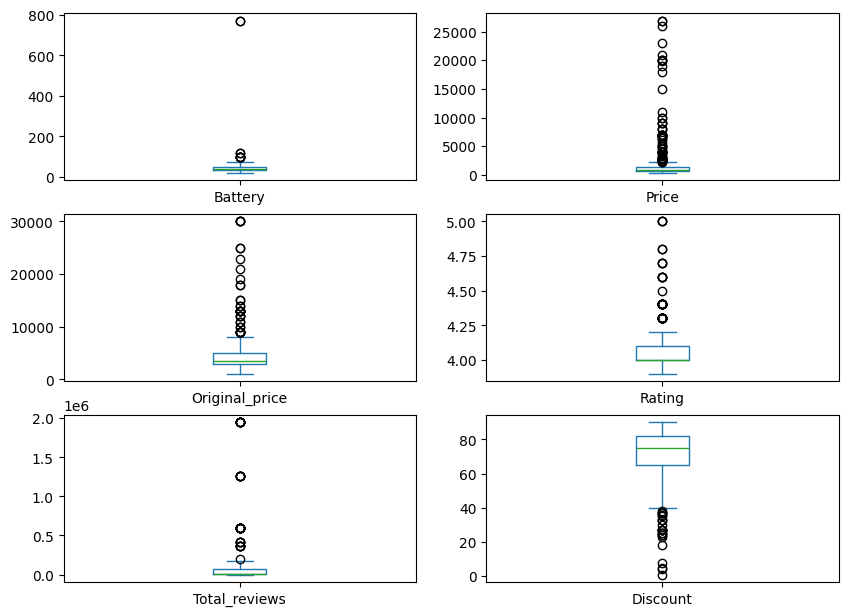

In [28]:
data.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

## create a function to plot different graphs in numerical columns

In [29]:
def numerical(df, column):
    print(df[column].agg(['min','max','mean','std','skew']))
    print()
    # distribution
    plt.figure(figsize=(8,4), layout= 'constrained')
    ## histogram
    plt.subplot(2,2,1)
    df[column].plot(kind='hist', bins=20)
    plt.title("Histogram plot")
    plt.xlabel(column)
    plt.ylabel('frequency')

    plt.subplot(2,2,2)
    df[column].plot(kind='kde')
    plt.title('KDE plot')
    plt.xlabel(column)

    plt.subplot(2,2,3)
    df[column].plot(kind='box')
    plt.title('Box plot')

    plt.subplot(2,2,4)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title('QQ for normal distribution')

## create a function to find outliers

In [30]:
def iqr(dataset, column):
    q1=dataset[column].quantile(0.25)
    q3=dataset[column].quantile(0.75)
    IQR=q3-q1
    lower_limit=(q1-IQR*1.5)
    upper_limit=(q3+IQR*1.5)
    outliers=(dataset[column] < lower_limit) | (dataset[column] > upper_limit)
    return len(dataset[outliers])

## adjust outlier with statistical method


In [31]:
def impute_outliers(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    # Replace outliers with the median
    median_value = dataset[column].median()
    dataset[column] = dataset[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)
    return dataset

## Price Disribution

min       360.000000
max     26900.000000
mean     1961.284091
std      3685.234958
skew        4.574847
Name: Price, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min      360.000000
max     2199.000000
mean     893.388636
std      330.642560
skew       1.254745
Name: Price, dtype: float64



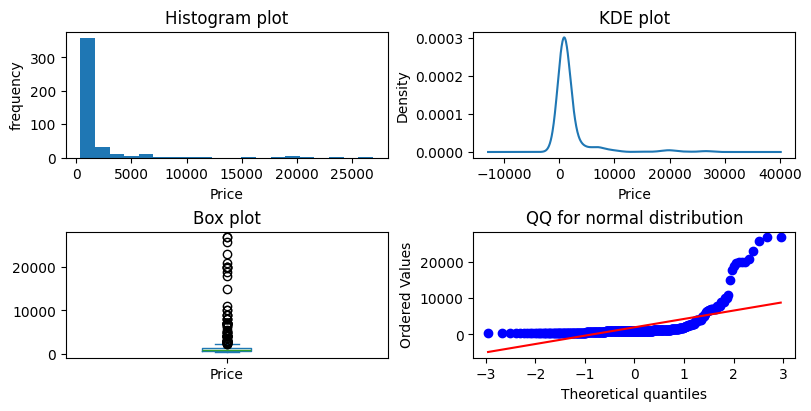

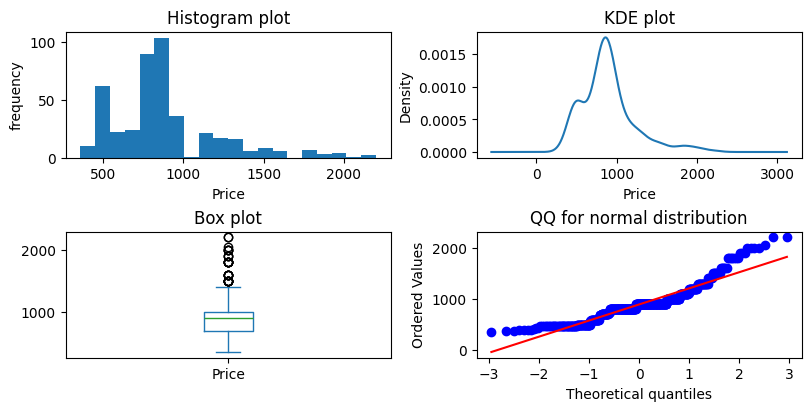

In [32]:
numerical(data, 'Price')
print('-'*200)
print('IQR is :-' , iqr(data,'Price'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Price')
numerical(cleaned_data, 'Price')

## observation 
* It is right-skewed 
* There are several outliers with higher prices
* The most peaks is around the 500-1000 range and another around the 1000-1500 range.

## Original_price Distribution

min      1099.000000
max     29990.000000
mean     4825.186364
std      3965.937128
skew        3.911162
Name: Original_price, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 38
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min     1099.000000
max     7999.000000
mean    3807.700000
std     1264.818955
skew       1.133788
Name: Original_price, dtype: float64



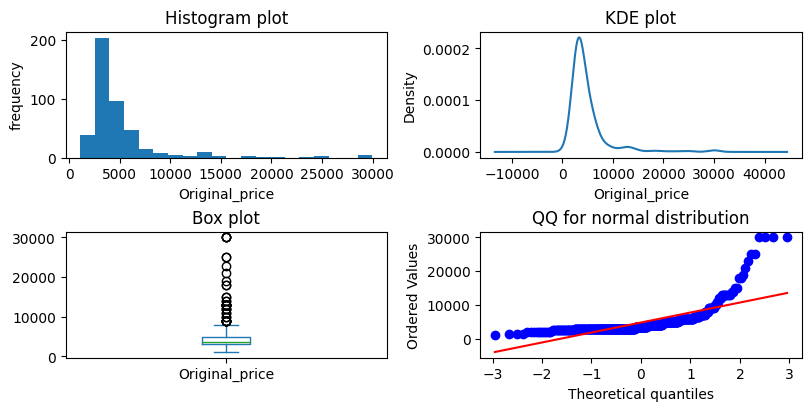

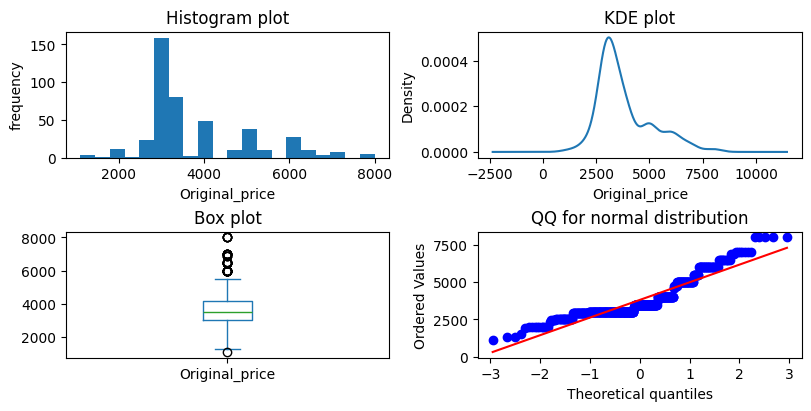

In [33]:
numerical(data, 'Original_price')
print('-'*200)
print('IQR is :-' , iqr(data,'Original_price'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Original_price')
numerical(cleaned_data, 'Original_price')

## obsevation
* It showing a right-skewed pattern with potential multiple modes.
* The box plot highlights several high-priced outliers significantly above the typical range.
* The most peaks is around the 2000-4000 range and another around the 4000-6000 range

## Battery Distribution

min      20.000000
max     771.000000
mean     47.265909
std      50.706577
skew     13.328312
Name: Battery, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 10
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min     20.000000
max     72.000000
mean    42.761364
std     10.179476
skew     0.437717
Name: Battery, dtype: float64



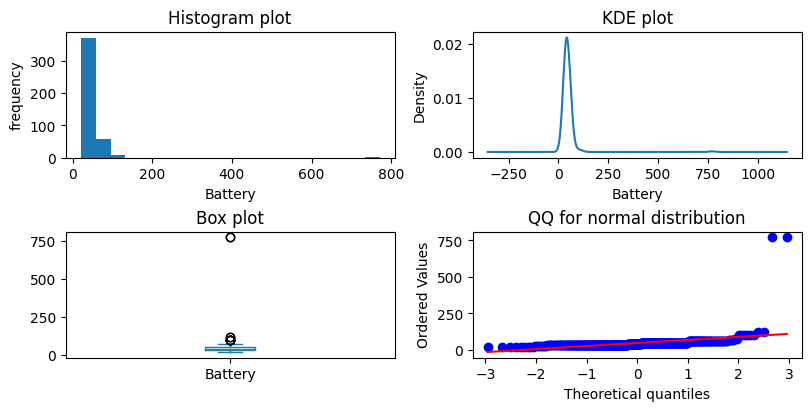

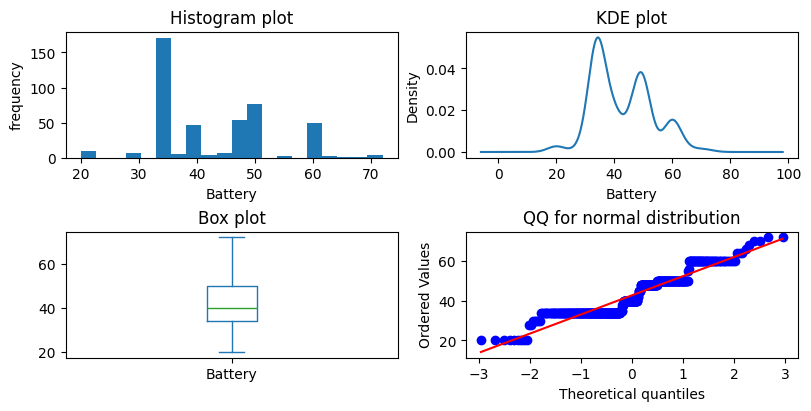

In [34]:
numerical(data, 'Battery')
print('-'*200)
print('IQR is :-' , iqr(data,'Battery'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Battery')
numerical(cleaned_data, 'Battery')

## obsevation
* The "Battery" variable exhibits a clear multimodal distribution
* The box plot does not indicate any significant outliers in the "Battery" data.
* The most prominent peak is around 30, suggesting that a large portion of the data points have a "Battery" value of around 30. There are also noticeable peaks around 40 and 60, indicating other common "Battery" values.

# Rating Distribution

min     3.900000
max     5.000000
mean    4.095682
std     0.157006
skew    2.785453
Name: Rating, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 55
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min     3.900000
max     4.200000
mean    4.040909
std     0.059681
skew    1.097746
Name: Rating, dtype: float64



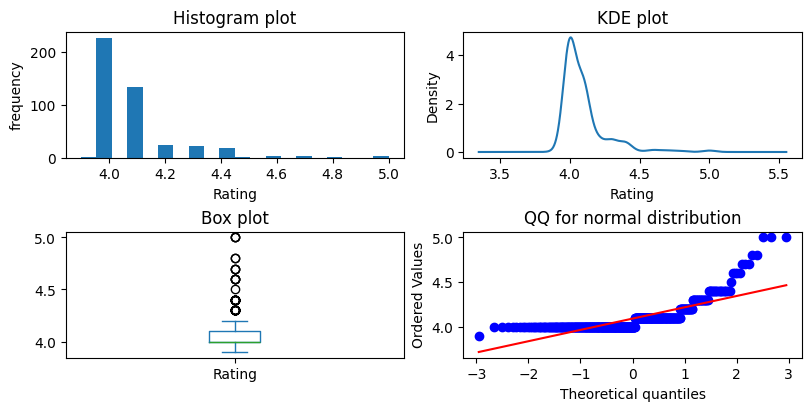

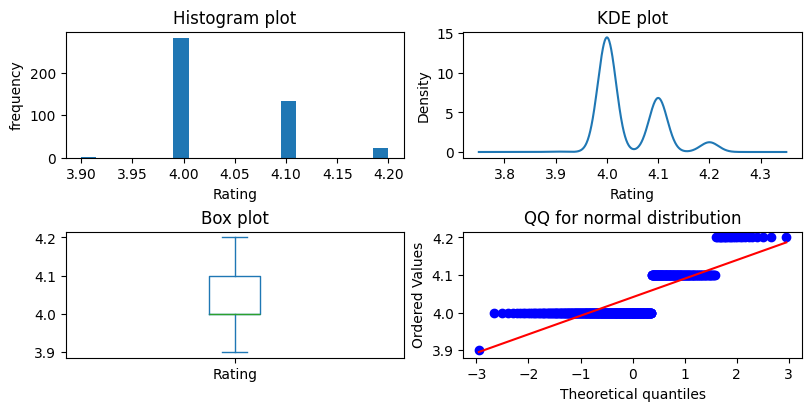

In [35]:
numerical(data, 'Rating')
print('-'*200)
print('IQR is :-' , iqr(data,'Rating'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Rating')
numerical(cleaned_data, 'Rating')

## observation
* The distribution is heavily skewed towards 4.0, with a large concentration of ratings at this value.
* The ratings are confined to a narrow range (3.9 to 4.2), suggesting a selective dataset or a rating system with limited variability.
* The most prominent peak is at 4.0, indicating that the majority of ratings are exactly 4.0

## Total_reviews Distribution

min     3.000000e+00
max     1.946756e+06
mean    1.116329e+05
std     3.121263e+05
skew    4.528153e+00
Name: Total_reviews, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 40
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min          3.000000
max     169713.000000
mean     29803.329545
std      45325.027982
skew         1.612905
Name: Total_reviews, dtype: float64



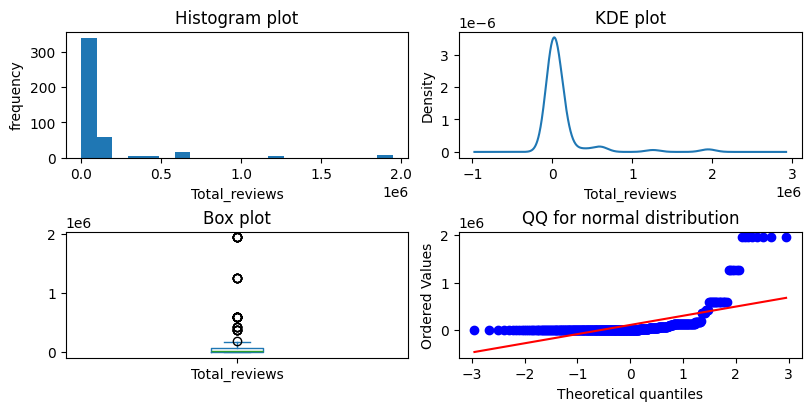

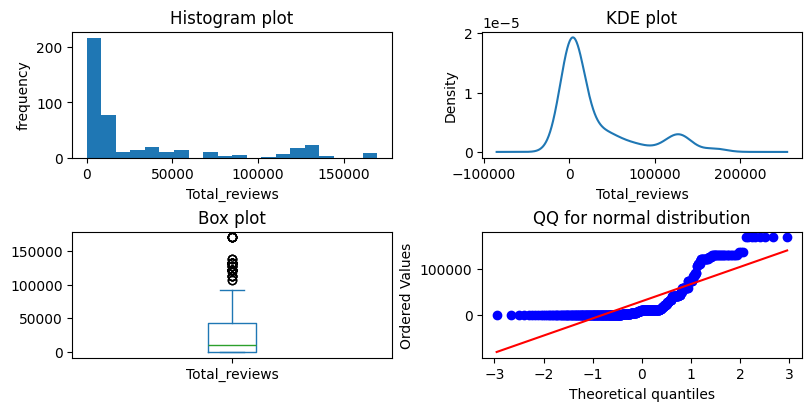

In [36]:
numerical(data, 'Total_reviews')
print('-'*200)
print('IQR is :-' , iqr(data,'Total_reviews'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Total_reviews')
numerical(cleaned_data, 'Total_reviews')

## observation
* Total_reviews" is heavily right-skewed
* The box plot shows several high-review outliers, suggesting some products are significantly more reviewed than others.

## Distribution Discount

min      1.000000
max     90.000000
mean    70.695455
std     15.293722
skew    -1.813970
Name: Discount, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :- 25
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
min     40.000000
max     90.000000
mean    73.500000
std     10.250174
skew    -1.136287
Name: Discount, dtype: float64



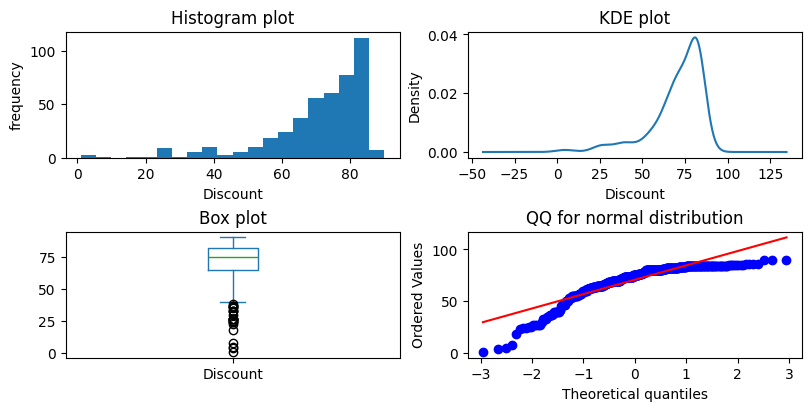

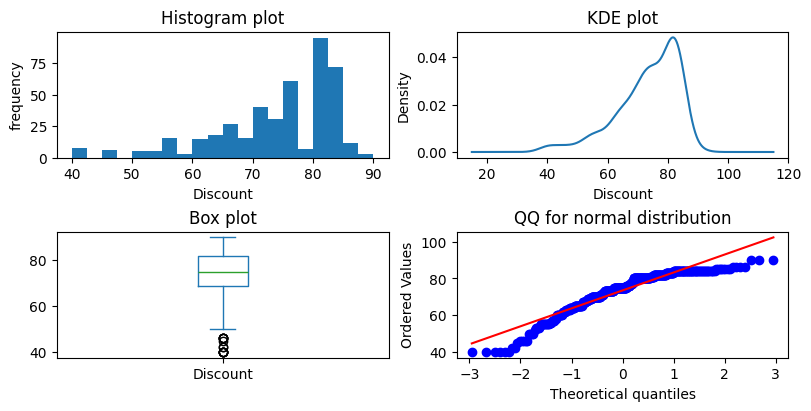

In [37]:
numerical(data, 'Discount')
print('-'*200)
print('IQR is :-' , iqr(data,'Discount'))
print('-'*200)
cleaned_data= impute_outliers(data.copy(), 'Discount')
numerical(cleaned_data, 'Discount')

## Observation
* The "Discount" data shows a bimodal distribution, suggesting two distinct groups with different discount ranges, likely around 70-80% and another around 60%.
* The distribution is slightly skewed to the right, indicating a few products have higher discounts than the majority.
* The box plot shows some low-discount outliers, indicating a few products have significantly lower discounts.

## univariate analysis on categorical data

Brand Counts:
 Brands
boult         75
aroma         61
boat          43
triggr        43
noise         30
hoppup        25
mivi          18
realme        15
sony          14
truke         13
ptron          7
nu             7
oneplus        6
beats          6
number         5
oppo           5
bose           4
cmf            4
chaebol        4
soundcore      3
sennheiser     3
nothing        3
oraimo         3
snowbudy       3
vivo           3
mi             3
pharaoh        2
izwi           2
infinix        2
dubstep        2
edyell         2
house          2
samsung        2
xewiss         2
tunifi         2
pb             2
saztech        1
portronics     1
touch          1
vmv            1
lava           1
moto           1
jabra          1
itel           1
jeevan         1
seashot        1
jbl            1
firegold       1
huawei         1
just           1
Name: count, dtype: int64

Brand Percentages:
 Brands
boult         17.045455
aroma         13.863636
boat           9.772727
tr

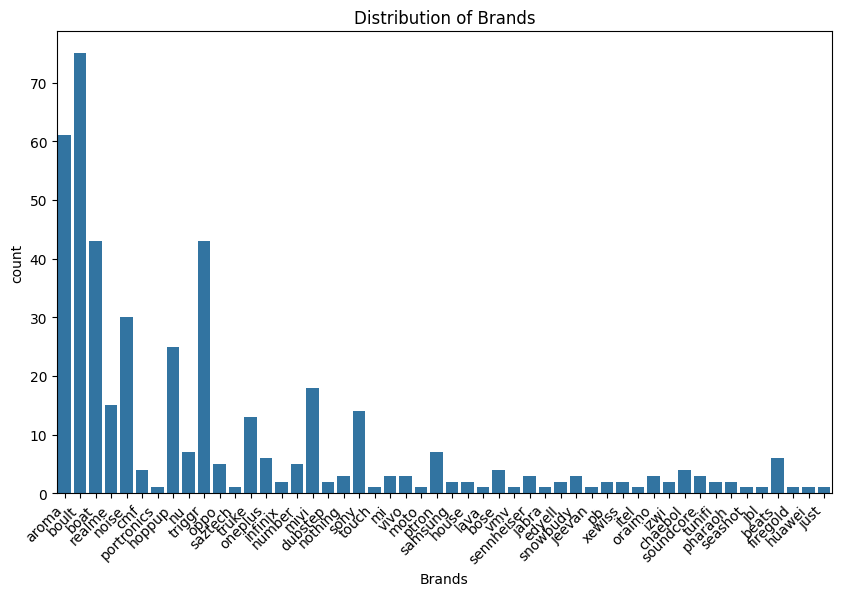


Most Frequent Brand (Mode): boult


In [38]:
brand_counts = data['Brands'].value_counts()
print("Brand Counts:\n", brand_counts)

brand_percentages = data['Brands'].value_counts(normalize=True) * 100
print("\nBrand Percentages:\n", brand_percentages)

plt.figure(figsize=(10, 6))
sns.countplot(x='Brands', data=data)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Brands")
plt.show()

print("\nMost Frequent Brand (Mode):", brand_counts.index[0])

## Observation
* Which brands are most prevalent in the dataset.
* The relative market share of each brand.
* If there are any niche brands with very low representation.

# Bivariate analysis

1.  This involves exploring relationships between pairs of variables.

### Scatter Plots:
* Plot price vs. rating to see if there's a correlation.
* Look for trends or clusters in the data.
### Correlation Matrices:
* Calculate the correlation between numerical variables.
* This helps quantify the strength and direction of linear relationships.
### Box Plots (Categorical vs. Numerical):
* Compare the distribution of price or rating across different brands.

## Bivariate analysis of num vs num 

### Price vs. Rating

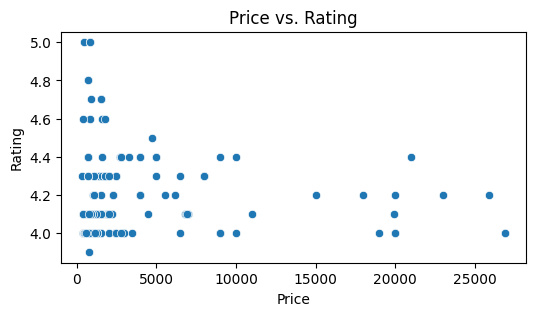

In [39]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Price vs. Rating')
plt.show()

## Price vs. Discount:

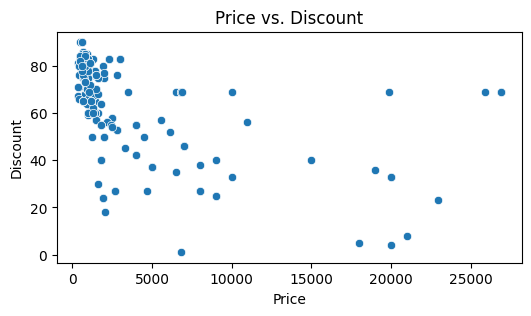

In [40]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x="Price", y="Discount", data=data)
plt.title("Price vs. Discount")
plt.show()

## Price vs. Original_price:

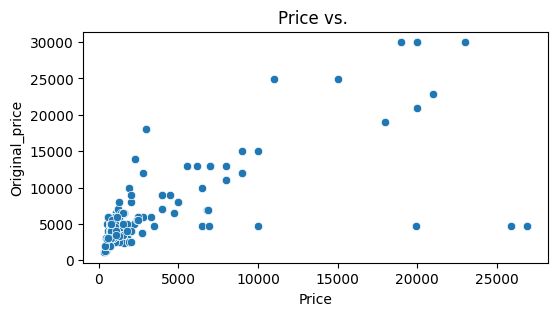

In [41]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x="Price", y="Original_price", data=data)
plt.title("Price vs. ")
plt.show()

## Price vs. battery:

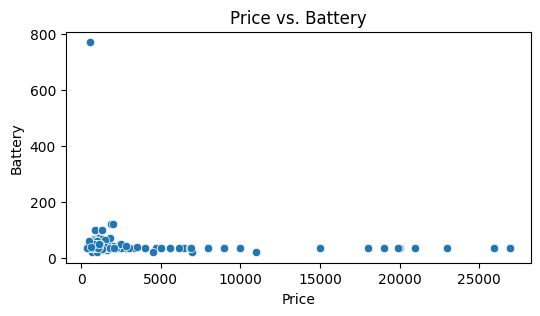

In [42]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x="Price", y="Battery", data=data)
plt.title("Price vs. Battery")
plt.show()

## Price vs. Total_reviews:

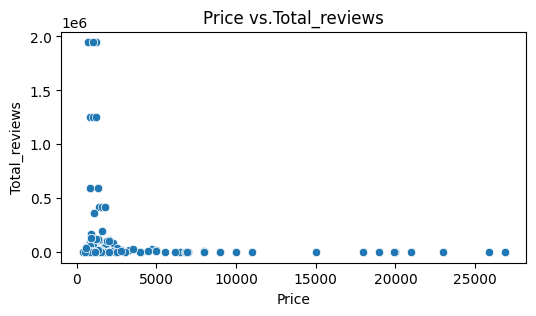

In [43]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x="Price", y="Total_reviews", data=data)
plt.title("Price vs.Total_reviews")
plt.show()

In [44]:
def categorical(data, column_name):
    if column_name in data:
        data[column_name].agg(['count','unique'])
        ##bar plot
        plt.figure(figsize=(8,4))
        data[column_name].value_counts().head(10).plot(kind='bar', color= 'green')
        plt.title('Bar plot')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.show()

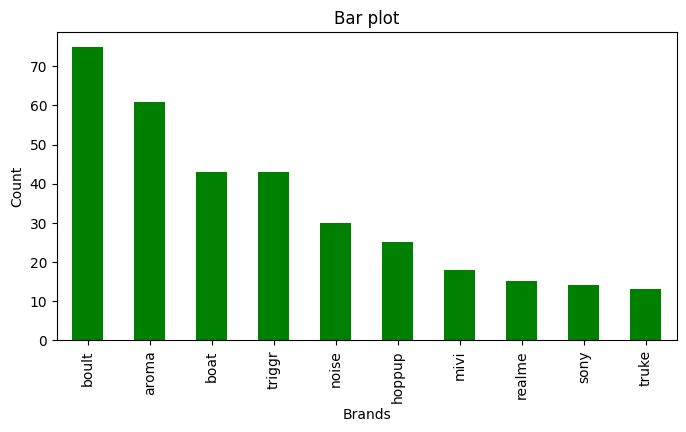

In [45]:
categorical(data, 'Brands')

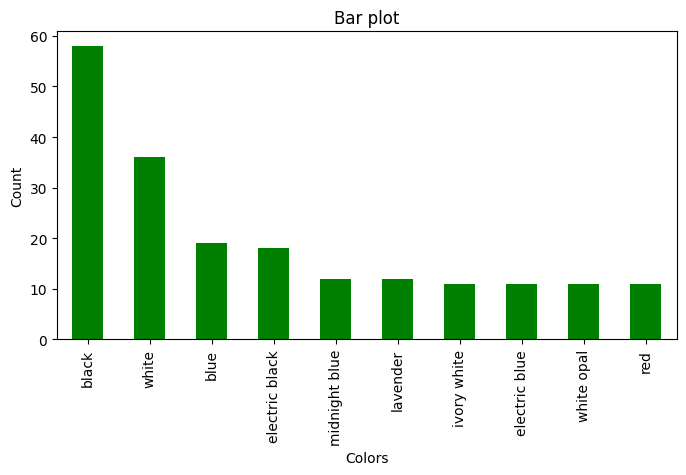

In [46]:
categorical(data, 'Colors')

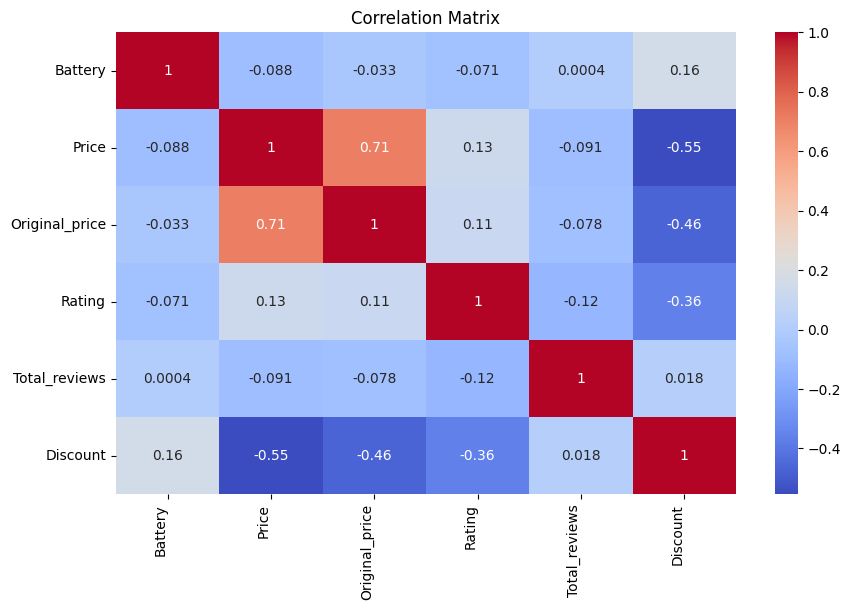

In [47]:
numerical_columns= data.select_dtypes(include= ['int64','float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0, ha='right')
plt.show()

## Bivariate analysis of num vs cat 

C:\Users\91708\AppData\Local\Temp\ipykernel_22904\2320631946.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Price'] = df_top10.groupby('Brands')['Price'].transform(remove_outliers_iqr) #replace Your_Numerical_Column


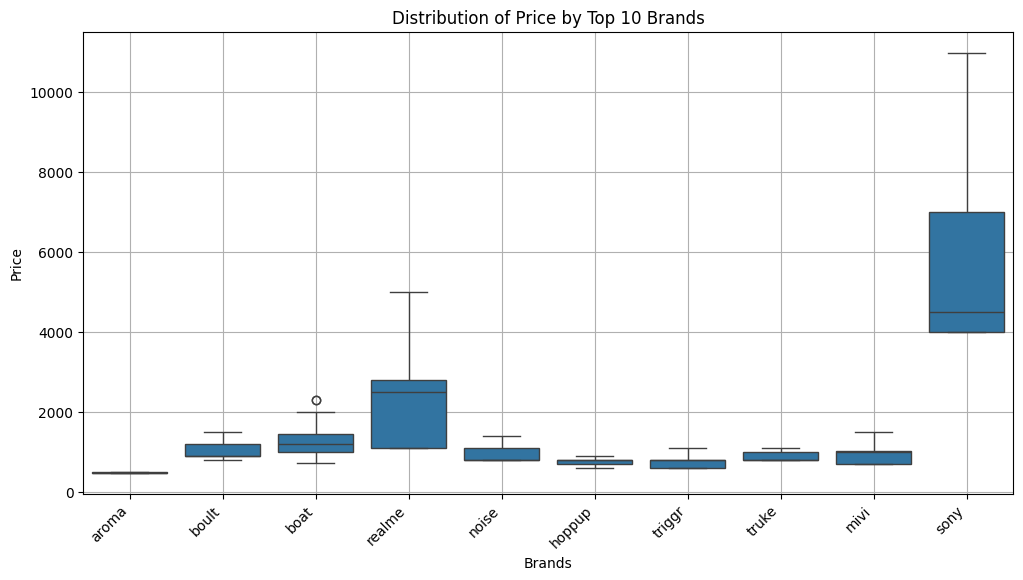

In [48]:
top_10_brands = data['Brands'].value_counts().index[:10]

# Filter the DataFrame for top 10 brands
df_top10 = data[data['Brands'].isin(top_10_brands)]
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from the numerical column
df_top10['Price'] = df_top10.groupby('Brands')['Price'].transform(remove_outliers_iqr) #replace Your_Numerical_Column
df_top10 = df_top10.dropna(subset=['Price'])

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brands', y='Price', data=df_top10) #replace Your_Numerical_Column
plt.title('Distribution of Price by Top 10 Brands') #replace Your_Numerical_Column
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

## Specific Insights:
The brands clearly target different market segments based on price. "triggr," "ptron," "hoppup," and "aroma" focus on budget-conscious consumers, while "mivi," "boat," "boult," and "noise" cater to a broader range, including those willing to pay more.

"mivi" stands out for its diverse product portfolio, including a significant number of outliers, indicating premium offerings.

The variations in median prices and price ranges reflect different pricing strategies.

## Bivariate analysis of descrite vs discrite data

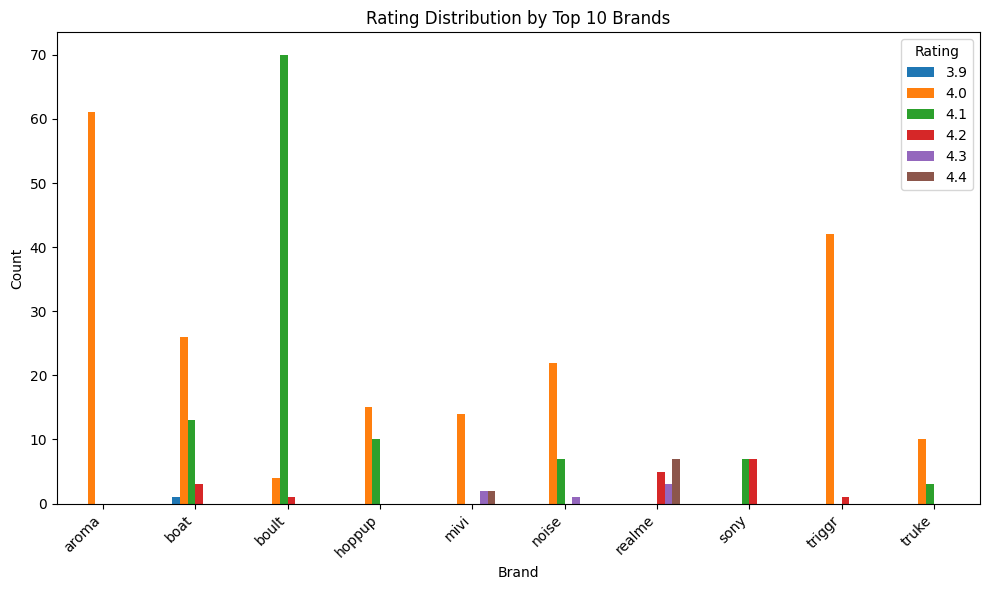

In [49]:
top_10_brands = data['Brands'].value_counts().index[:10]
df_top10 = data[data['Brands'].isin(top_10_brands)]

# Create crosstab
crosstab_data = pd.crosstab(df_top10['Brands'], df_top10['Rating']) #Replace Rating with your second discrete data column.

# Create grouped bar plot
crosstab_data.plot(kind='bar', figsize=(10, 6))
plt.title('Rating Distribution by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

4.0 and 4.1 ratings are the most common across most brands, indicating a generally positive customer experience.

The rating patterns help differentiate brands in terms of perceived quality or customer satisfaction.

Some brands (aroma, mivi, triggr) show a high degree of consistency with a single dominant rating, while others (boat, boult, noise, ptron, truke) have a wider spread.